# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association (such as correlation between numerical variables) between two categorical variables. There are more columns for feature engineering, but we will focus on the name column and filling missing values in other columns.

To illustrate the concept, we will use the "titanic" dataset. This is a well explored dataset but provides a lot of opportunities for feature engineering. Our task is predicting the survival of a passenger, but we will not build a model in this homework.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import re
import random
%matplotlib inline
sns.set(style="darkgrid")
from sklearn import preprocessing

In [67]:

titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [68]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [69]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [70]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin (687/891). We can't drop records based on cabin. We will encode not having a cabin as character **O**

# Q1 (.5 points) Fill NAN in cabin with Character 'O'

In [71]:
titanic_df['Cabin'] = titanic_df['Cabin'].replace(np.nan, 'O')


In [72]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter (C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [73]:
titanic_df['Cabin'] = titanic_df['Cabin'].str.replace(r"(?<=[A-Z]).*",r"", regex=True)

In [74]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

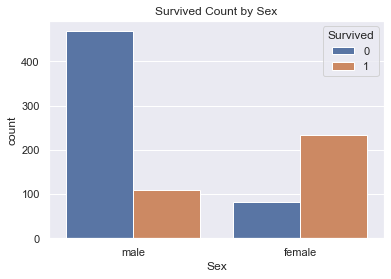

In [75]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title("Survived Count by Sex")
plt.show()

# Q4(.5) What is your observation from this plot.

Women were more likely to survive then men. More women survived then died, whereas more men died rather than survived.





We can't use name as a feature for building any machine learning classifier (logistic regression). Let's look at Name column and see if we can think of a better feature for name.

In [76]:
titanic_df['Name'].sample(30)

351           Williams-Lambert, Mr. Fletcher Fellows
557                              Robbins, Mr. Victor
407                   Richards, Master. William Rowe
331                              Partner, Mr. Austen
491                              Windelov, Mr. Einar
177                       Isham, Miss. Ann Elizabeth
291          Bishop, Mrs. Dickinson H (Helen Walton)
370                      Harder, Mr. George Achilles
430        Bjornstrom-Steffansson, Mr. Mauritz Hakan
706                    Kelly, Mrs. Florence "Fannie"
418                       Matthews, Mr. William John
785               Harmer, Mr. Abraham (David Lishin)
854    Carter, Mrs. Ernest Courtenay (Lilian Hughes)
879    Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
93                           Dean, Mr. Bertram Frank
272        Mellinger, Mrs. (Elizabeth Anne Maidment)
209                                 Blank, Mr. Henry
570                               Harris, Mr. George
727                         Mannion, Miss. Mar

# Q5.(.5 points) Can you suggest a feature based on *Name* column. 

We can utilize the title (Mr, Mrs, Ms, etc) as the feature, rather then the full name.




# Q6(.5 points) Create a new feature named *Title* from the *Name* column.

Hint: Here are different titles

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different titles meant that time.

In [77]:
 titanic_df['Title'] = titanic_df['Name'].str.extract(r'(?:\,(.*?)\.)')

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plots for males and for females.

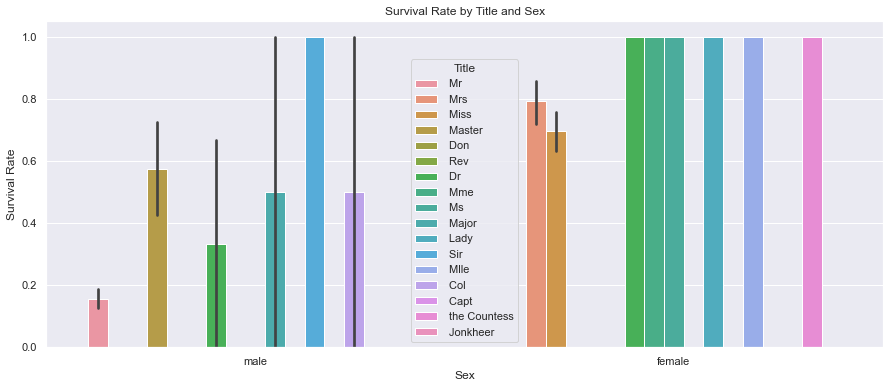

In [78]:
#surv_title = titanic_df.groupby('Title')('Survived').sum()
#surv_title
                                         
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Sex', y='Survived', hue='Title', data=titanic_df, ax=ax)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Title and Sex')
plt.show()

# Q 8(.5 points) What is your observation from these plots?

Taking titles into consideration, more women survived then men. Men were more likely to survive if they had the title 'Sir'.

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age NaN value by the mean for each **Title** group.

In [85]:
titanic_df['Age'] = titanic_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))
titanic_df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.000000,0,0,2620,7.2250,O,C,Mr
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,32.368090,0,0,372622,7.7500,O,Q,Mr
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.000000,0,0,365226,6.7500,O,Q,Miss
189,190,0,3,"Turcin, Mr. Stjepan",male,36.000000,0,0,349247,7.8958,O,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,32.368090,0,0,112052,0.0000,O,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,35.898148,0,0,2649,7.2250,O,C,Mrs
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.000000,0,0,C 4001,22.5250,O,S,Mr
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.000000,0,0,347078,7.7500,O,S,Mr
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.000000,0,0,4134,9.5875,O,S,Mrs
29,30,0,3,"Todoroff, Mr. Lalio",male,32.368090,0,0,349216,7.8958,O,S,Mr


In [16]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
dtype: int64

There are two records with a missing Embarked value.

In [17]:
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [18]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [19]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

In [20]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [21]:
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns = ['Title', 'Cabin'])

In [22]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_ Capt,Title_ Col,...,Title_ the Countess,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_O,Cabin_T
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
titanic_clean_df.dtypes

Survived                 int64
Pclass                   int64
Sex                      int32
Age                     object
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked                object
Title_ Capt              uint8
Title_ Col               uint8
Title_ Don               uint8
Title_ Dr                uint8
Title_ Jonkheer          uint8
Title_ Lady              uint8
Title_ Major             uint8
Title_ Master            uint8
Title_ Miss              uint8
Title_ Mlle              uint8
Title_ Mme               uint8
Title_ Mr                uint8
Title_ Mrs               uint8
Title_ Ms                uint8
Title_ Rev               uint8
Title_ Sir               uint8
Title_ the Countess      uint8
Cabin_A                  uint8
Cabin_B                  uint8
Cabin_C                  uint8
Cabin_D                  uint8
Cabin_E                  uint8
Cabin_F                  uint8
Cabin_G                  uint8
Cabin_O 

# Q11.(.5) Plot a heatmap of correlation using titanic_df.

<AxesSubplot:>

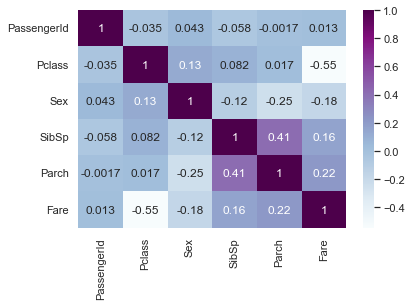

In [30]:
new_titanic = titanic_df.drop(['Survived'], axis=1)
sns.heatmap(new_titanic.corr(), annot=True, cmap='BuPu')

# Q 12.(.5) What are your observations from this heatmap.

SibSp (number of siblings/spouses onboard) and Parch (number of parent/children on board) were very closely related. There is a slight positive correlation between the fare paid and the survival rate. There is a strong negative relationship between fair and class.

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not be a linear relationship between variables (Survived vs any other attributes).

For categorical variables, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of the Pearson’s Chi-Square Test.

Let us use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let us copy and paste this here:

In [31]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let us work with  titanic dataset again.


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select records with Title value = *Master., Miss., Mr. or Mrs.*  into titanic_df_small.

You can check that other titles do not have enough records, hence we will ignore them in our analysis.

In [45]:
titanic_df_small = titanic_df.loc[titanic_df['Title'].str.contains('Master|Miss|Mr|Mrs')]
titanic_df_small


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,O,Q,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,O,1,2,W./C. 6607,23.4500,O,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,Mr


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [53]:
s_vs_t = pd.crosstab(titanic_df_small.Survived, titanic_df_small.Title)
s_vs_t

Title,Master,Miss,Mr,Mrs
Survived,,,,
0,17,55,436,26
1,23,126,81,98


In [54]:
cramers_v(s_vs_t.values)

0.56837187121439

# Q 15 (.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [56]:
label_encoder = preprocessing.LabelEncoder()
titanic_df_small['Encoded_title'] = label_encoder.fit_transform(titanic_df_small['Title'])
titanic_df_small


C:\Users\kmind\AppData\Local\Temp/ipykernel_29272/585975570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_small['Encoded_title'] = label_encoder.fit_transform(titanic_df_small['Title'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Encoded_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,O,Q,Mrs,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,O,1,2,W./C. 6607,23.4500,O,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,Mr,2


# Q 16 (.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [62]:
corrcoef = np.corrcoef(titanic_df_small.Survived,titanic_df_small.Encoded_title)[0,1]
corrcoef

-0.07287583211561176

# Q 17. (.5 points) What is your observation comparing the use of cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

The correlation was not as strong when using correlation coefficients on survived/encoded_title compared to using Cramer's V on Survived and Title. The correlation was also positive with Cramer's V, and was slightly negative with correlation coefficient.